<a href="https://colab.research.google.com/github/antussa2016/thesis_work/blob/master/data_analysis/R_Q_A_and_Tweets_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import ast
import json

In [3]:
df = pd.read_csv('/content/drive/MyDrive/test_model_01.csv')

# **remove duplicates**

In [ ]:
# df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   encoded_data  1247 non-null   object 
 1   Reputation    1247 non-null   float64
 2   Question      1247 non-null   float64
 3   Answer        1247 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.1+ KB


In [7]:
df['encoded_data'].describe()

count                                                  1247
unique                                                  803
top       [-7.20829546e-01 -2.91609019e-01 -1.33424237e-...
freq                                                      4
Name: encoded_data, dtype: object

In [8]:
df['encoded_data'] = df['encoded_data'].str.replace('\n', '')

In [9]:
df['encoded_data']  = df['encoded_data'].str.split().str.join(" ")

In [10]:
df['encoded_data'] = df['encoded_data'].str.strip('[]').str.split()

In [11]:
print (type(df.loc[0, 'encoded_data'][0]))

<class 'str'>


In [ ]:
# df.encoded_values.str.strip("[]").str.split(", ", expand=True, regex=False).astype(float)

In [12]:
df['encoded_data'] = df['encoded_data'].apply(lambda x: [float(y) for y in x])

df['encoded_data'] = [[float(y) for y in x] for x in df['encoded_data']]

In [13]:
print (type(df.loc[0, 'encoded_data'][0]))

<class 'float'>


In [ ]:
df['encoded_data']

# **To reshape**

In [14]:
x = np.array(df['encoded_data'].tolist())

# check the shape of the resulting array
print(x.shape)

(1247, 768)


In [ ]:
# y = np.array(df['Reputation'].tolist())

In [ ]:
# df2 = pd.DataFrame(df['encoded_values'].tolist(), index=df.index).astype(float).join(df[['encoded_values','Reputation']])

In [ ]:
# df.explode('encoded_values').astype({'encoded_values':float})

In [ ]:
# df = df.drop(columns=['Question', 'Answer'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# x = df.drop('Reputation', axis=1)
y = df['Answer']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)

In [18]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (997, 768)
X_test shape: (250, 768)
y_train shape: (997,)
y_test shape: (250,)


In [ ]:
len(x_test)

250

In [ ]:
x_train[0].shape

(768,)

# **Feedforward Model**

In [19]:
model = Sequential([
    keras.layers.Dense(100, input_shape=(768,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=10,batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.2344 - accuracy: 0.8806 - val_loss: 0.2652 - val_accuracy: 0.8600
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2425 - accuracy: 0.8806 - val_loss: 0.2520 - val_accuracy: 0.8600
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.8806 - val_loss: 0.2576 - val_accuracy: 0.8600
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.8806 - val_loss: 0.2506 - val_accuracy: 0.8600
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.8806 - val_loss: 0.2576 - val_accuracy: 0.8600
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2290 - accuracy: 0.8806 - val_loss: 0.2511 - val_accuracy: 0.8600
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2221 - accuracy: 0.8806 - val_loss: 0.2532 - val_accuracy: 0.8600
Epoch 8/10
32/32 [==

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test).squeeze()

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

8/8 [==============================] - 0s 2ms/step


In [23]:
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1086
Mean Squared Error (MSE): 0.0423
Root Mean Squared Error (RMSE): 0.2057
R-squared (R2): 0.0251


# **Evaluate the model**

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8600
Loss=0.243
Accuracy=0.860


In [ ]:
prediction = model.predict(x_test)

8/8 [==============================] - 0s 1ms/step


In [ ]:
prediction[:50]

In [ ]:
y_test[:50]

In [ ]:
y_pred = []
for element in prediction:
    if element > 0.9:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:25]

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]

In [ ]:
Y_test = []
for i in y_test:
    if i> 0.9:
        Y_test.append(1)
    else:
        Y_test.append(0)

In [ ]:
Y_test[:50]

# **COnfusion Matric**

In [ ]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, classification_report

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1'])

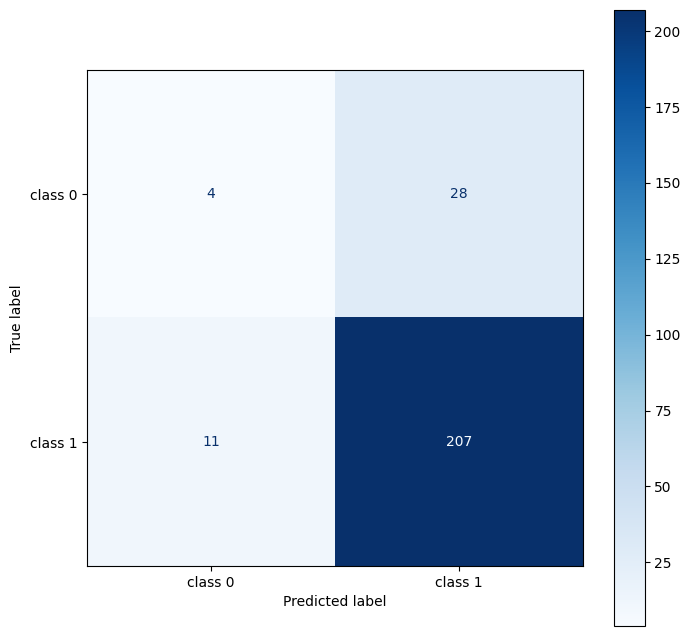

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax, cmap='Blues')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.12      0.17        32
           1       0.88      0.95      0.91       218

    accuracy                           0.84       250
   macro avg       0.57      0.54      0.54       250
weighted avg       0.80      0.84      0.82       250



# **Building 1DCNN Model**



In [24]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768, 1)))# add 1D convolutional layer
model.add(MaxPooling1D(pool_size=2))# add max pooling layer
model.add(Flatten())# add flatten layer
model.add(Dense(64, activation='relu'))# add dense layer
model.add(Dense(1, activation='sigmoid'))# add output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # compile the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
32/32 [==============================] - 3s 65ms/step - loss: 0.2836 - accuracy: 0.8546
Epoch 2/10
32/32 [==============================] - 3s 80ms/step - loss: 0.2349 - accuracy: 0.8806
Epoch 3/10
32/32 [==============================] - 1s 43ms/step - loss: 0.2432 - accuracy: 0.8806
Epoch 4/10
32/32 [==============================] - 1s 37ms/step - loss: 0.2379 - accuracy: 0.8806
Epoch 5/10
32/32 [==============================] - 2s 62ms/step - loss: 0.2340 - accuracy: 0.8806
Epoch 6/10
32/32 [==============================] - 2s 65ms/step - loss: 0.2311 - accuracy: 0.8806
Epoch 7/10
32/32 [==============================] - 1s 40ms/step - loss: 0.2280 - accuracy: 0.8806
Epoch 8/10
32/32 [==============================] - 2s 57ms/step - loss: 0.2253 - accuracy: 0.8806
Epoch 9/10
32/32 [==============================] - 2s 45ms/step - loss: 0.2271 - accuracy: 0.8806
Epoch 10/10
32/32 [==============================] - 1s 38ms/step - loss: 0.2232 - accuracy: 0.8806


In [25]:
test_loss,test_acc=model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 10ms/step - loss: 0.2626 - accuracy: 0.8600


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test).squeeze()

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

8/8 [==============================] - 0s 16ms/step


In [27]:
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.0959
Mean Squared Error (MSE): 0.0441
Root Mean Squared Error (RMSE): 0.2099
R-squared (R2): -0.0157


# **LSTM Model building**

In [28]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))

In [29]:
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [30]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 768)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
32/32 [==============================] - 7s 10ms/step - loss: 0.2639 - accuracy: 0.8526
Epoch 2/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2302 - accuracy: 0.8806
Epoch 3/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2298 - accuracy: 0.8806
Epoch 4/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2303 - accuracy: 0.8806
Epoch 5/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2293 - accuracy: 0.8806
Epoch 6/10
32/32 [==============================] - 0s 11ms/step - loss: 0.2286 - accuracy: 0.8806
Epoch 7/10
32/32 [==============================] - 0s 11ms/step - loss: 0.2297 - accuracy: 0.8806
Epoch 8/10
32/32 [==============================] - 0s 11ms/step - loss: 0.2276 - accuracy: 0.8806
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 0.2268 - accuracy: 0.8806
Epoch 10/10
32/32 [==============================] - 0s 10ms/step - loss: 0.2254 - accuracy: 0.8806


In [31]:
test_loss,test_acc=model.evaluate(x_test,y_test)

8/8 [==============================] - 1s 5ms/step - loss: 0.2527 - accuracy: 0.8600


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test).squeeze()

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

8/8 [==============================] - 0s 3ms/step


In [33]:
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1200
Mean Squared Error (MSE): 0.0432
Root Mean Squared Error (RMSE): 0.2078
R-squared (R2): 0.0051


# **Accuracy for reputation** 0.4%

FFNN.......  0.0040

1DCNN...... 0.0040

LSTM.....  0.0040


# **Accuracy for question** 8.8%

FFNN....... 0.0880

1DCNN...... 0.0880

LSTM.....   0.0880

# **Accuracy for Answer** 86%

FFNN....... 0.8600

1DCNN...... 0.8600

LSTM..... 0.8600
